In [45]:
# Import packages 
from pyexpat import native_encoding
import pandas as pd
import numpy as np
import pandas.plotting as plotting
import scipy
import urllib
import os 
import seaborn 
import matplotlib as plt
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy import stats
from pandas.plotting import scatter_matrix 

3.1.1. Data Representation and Interaction 



In [6]:
# Create dataframe 
df = pd.read_csv('brain_size.csv', sep = ';', na_values = '.')
df.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [7]:
# Create from arrays 
t = np.linspace(-6,6,20)
sin_t = np.sin(t)
cos_t = np.cos(t)

# Expose this as pandas dataframe
pd.DataFrame({'t':t, 'sin':sin_t, 'cos':cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


In [8]:
# Manipulating Data
df.shape

(40, 8)

In [9]:
df.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [10]:
print(df['Gender'])

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [11]:
df[df['Gender'] == 'Female']['VIQ'].mean()

109.45

In [12]:
# From lecture: "groupby: splitting a dataframe on values of categorical variables"
# Use groupby to split data frame by categorical variables
groupby_gender = df.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [13]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [14]:
# Exercise: What is the mean value for VIQ for the full population?
df['VIQ'].mean()

112.35

In [15]:
# Exercise: How many males/females were included in this study?
df['Gender'].count()


40

In [18]:
# Exercise: What is the average value of MRI counts expressed in log units, for males and females?
df['MRI_base10'] = np.log10(df['MRI_Count'])
print(df['MRI_base10'])

0     5.912186
1     6.000487
2     6.016380
3     5.984686
4     5.978429
5     5.967922
6     5.996207
7     5.931589
8     5.956580
9     5.980215
10    5.921097
11    6.033242
12    5.965700
13    5.932713
14    5.943938
15    5.937198
16    5.930564
17    5.975472
18    5.907422
19    5.948942
20    5.950569
21    5.957099
22    5.897967
23    5.980005
24    5.920004
25    5.971041
26    5.902336
27    6.026313
28    5.899574
29    5.937850
30    5.933377
31    5.977536
32    5.999098
33    5.944476
34    5.921345
35    5.976839
36    5.977447
37    5.951329
38    5.968490
39    5.971212
Name: MRI_base10, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1715cffa60>,
      dtype=object)

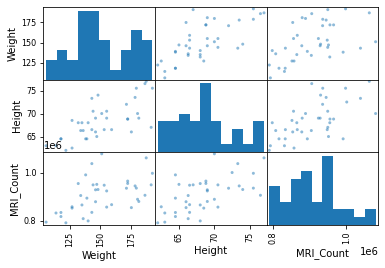

In [25]:
scatter_matrix(df[['Weight', 'Height', 'MRI_Count']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1715a09790>,
      dtype=object)

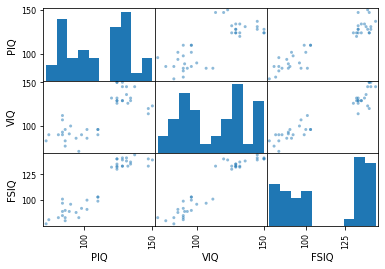

In [26]:
scatter_matrix(df[['PIQ', 'VIQ', 'FSIQ']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1715340eb0>,
      dtype=object)

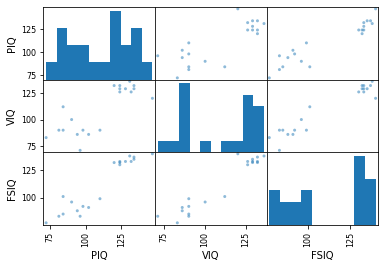

In [27]:
# Exercise: First plot the scatter matrix for females only.
df_f = df.loc[df['Gender'] == 'Female']
scatter_matrix(df_f[['PIQ', 'VIQ', 'FSIQ']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f171511b3a0>,
      dtype=object)

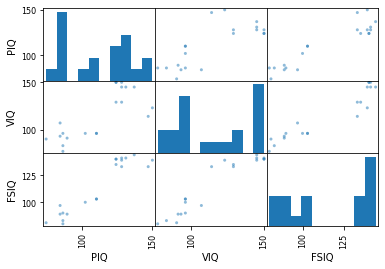

In [28]:
# Exercise: Then, plot the scatter matrix for males only
scatter_matrix(df.loc[df['Gender'] == 'Male'][['PIQ', 'VIQ', 'FSIQ']])

In [29]:
# Exercise: Do you think that the 2 sub-populations correspond to gender?
# Yes, I think that the 2 sub-populations correspond to gender


3.1.2 Hypothesis Testing: Comparing Two Groups

In [33]:
# 1-sample t-test: testing the value of a population mean
stats.ttest_1samp(df['VIQ'],0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [31]:
# 2-sample t-test: testing for difference across populations
female_viq = df[df['Gender'] == 'Female']['VIQ']
male_viq = df[df['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)                        


Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

In [32]:
# Paired tests: repeated measurements on the same individuals
stats.ttest_ind(df['FSIQ'], df['PIQ'])

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

In [34]:
stats.ttest_rel(df['FSIQ'], df['PIQ'])
# This is equivalent to a 1-sample test on the difference: stats.ttest_1samp(df['FSIQ']- df['PIQ'], 0)

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [35]:
stats.wilcoxon(df['FSIQ'], df['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

In [36]:
# Exercise: Test the difference between weights in males and females
female_weight = df[df['Gender'] == 'Female']['Weight'] 
male_weight = df[df['Gender'] == 'Male']['Weight']
stats.ttest_ind(female_weight, male_weight)

Ttest_indResult(statistic=nan, pvalue=nan)

3.1.3. Linear models, multiple factors, and analysis of variance

In [37]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)
y = -5 + 3*x + 4 * np.random.normal(size = x.shape)
data = pd.DataFrame({'x':x, 'y':y})

# specify an OLS model and fit it
model = ols('y~x', data).fit()

# inspect the various statistics derived from the fit
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           8.56e-08
Time:                        03:47:03   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

In [38]:
# Exercise: Retrieve the estimated parameters from the model above
model.params

Intercept   -5.533459
x            2.936888
dtype: float64

In [39]:
# Categorical variables: comparing groups or multiple categories
model = ols("VIQ ~ Gender + 1", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Tue, 06 Dec 2022   Prob (F-statistic):              0.445
Time:                        03:48:02   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [41]:
# Multiple Regression: including multiple factors
df2 = pd.read_csv('iris.csv')
model = ols('sepal_width ~ name + petal_length', df2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           1.58e-20
Time:                        03:51:22   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

In [42]:
print(model.f_test([0,1,-1,0]))

<F test: F=array([[3.24533535]]), p=0.07369058781701113, df_denom=146, df_num=1>


In [43]:
if not os.path.exists('wages.txt'):
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')
# name for columns
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

data = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None)
data.columns = short_names

# Log-transform the wages
import numpy as np
data['WAGE'] = np.log10(data['WAGE'])

data.head()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,0.707570,35,2,6,1,1
1,9,0,1,42,0,0.694605,57,3,6,1,1
2,12,0,0,1,0,0.824126,19,3,6,1,0
3,12,0,0,4,0,0.602060,22,3,6,0,0
4,12,0,0,17,0,0.875061,35,3,6,0,1


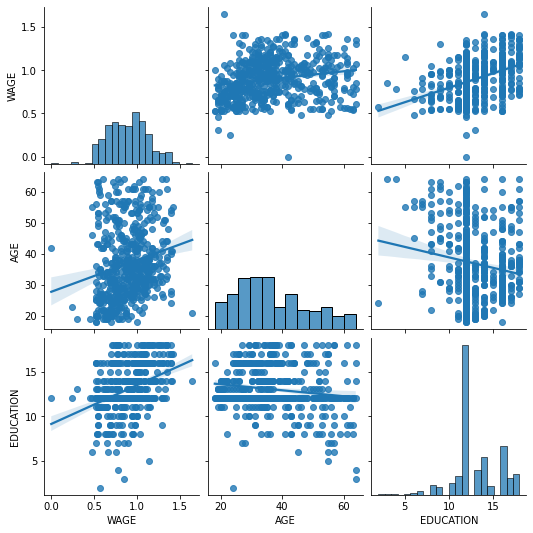

In [46]:
# Pairplot: scatter matrices
seaborn.pairplot(data, vars = ['WAGE', 'AGE', 'EDUCATION'], kind = 'reg')

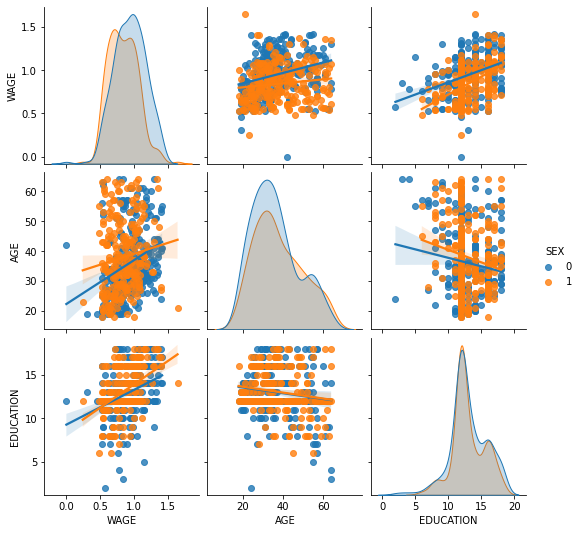

In [47]:
seaborn.pairplot(data,vars=['WAGE','AGE','EDUCATION'],kind='reg',hue='SEX')

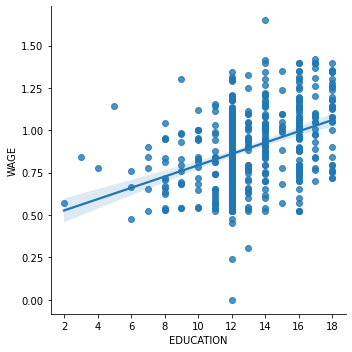

In [48]:
# lmplot: plotting a univariate regression
seaborn.lmplot(y='WAGE', x='EDUCATION', data = data)

In [50]:
# Testing for interactions
result = ols(formula = 'WAGE ~ EDUCATION + SEX + EDUCATION * SEX', data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           2.94e-25
Time:                        04:01:23   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861